In [1]:
from src.preprocessing import Preprocess
from src.plotting import Plotting
import os

In [2]:
# Carregando base de dados
DIRECTORY = fr"..\AED - Mercado Imobiliario\data\global_housing_market_extended.csv"
process = Preprocess(DIRECTORY)
plt = Plotting()

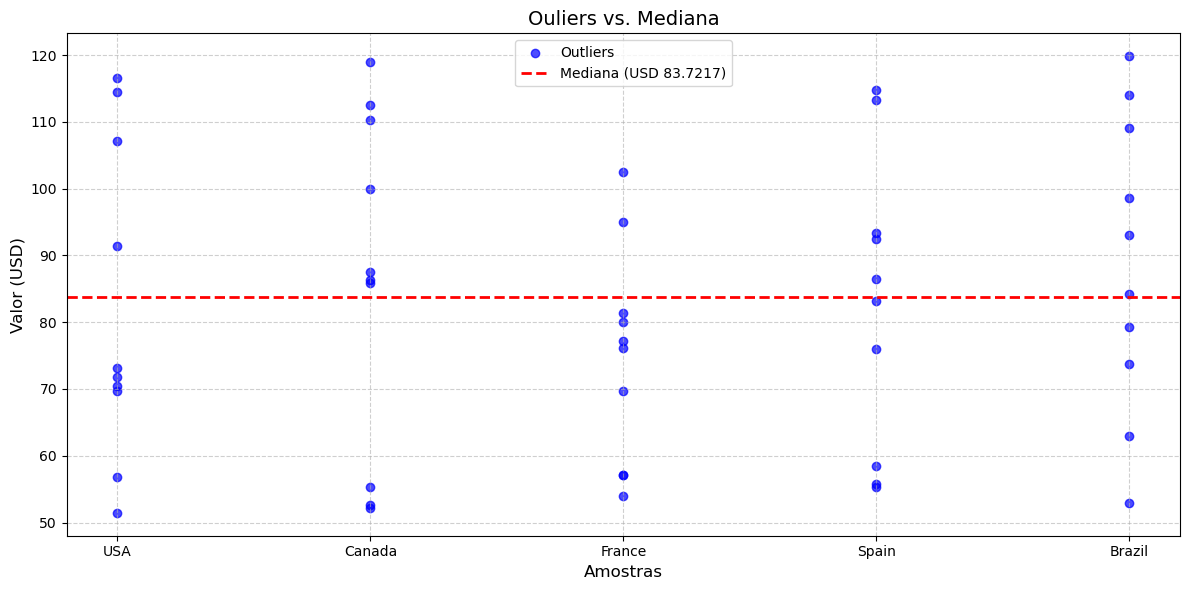

In [3]:
# verificando se há Outliers em Median Rental Price
median_rental = process.get_unique_column("Rent Index", method="median")
while True:
    option = input("Deseja verificar algum país específico ?(S/N): ")
    match option.lower():
        case "s":
            qtd = int(input("Qual a quantidade de paises ?:"))
            paises = []
            c = 0
            while True:
                pais = input("País desejado: ")
                paises.append(pais)
                c += 1
                if c == qtd: break
            plt.plot_Outliers(process.select_country(paises), median_rental)
            break
        case "n":
            plt.plot_Outliers(process.select_country(), median_rental)
            break
        case _: 
            print("Digite uma opcao valida")
            break

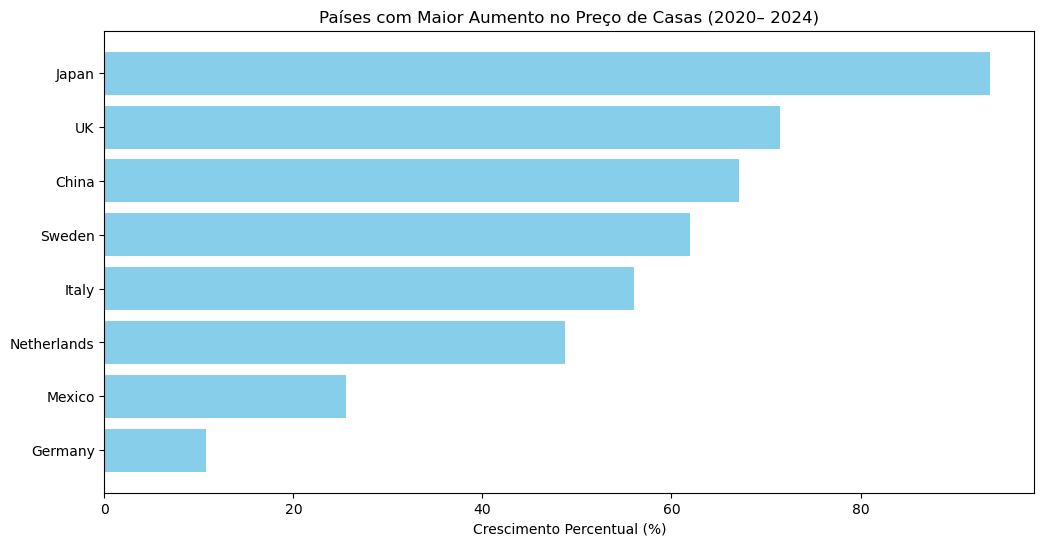

In [4]:
years = list(input("Ano inicial, Ano final:").split(","))
qtd = int(input("Quantidade paises que deseja ver:"))
top_country = process.get_best_countries_with_growth(years[0], years[1], qtd)
plt.countries_growth(top_country, years[0], years[1])

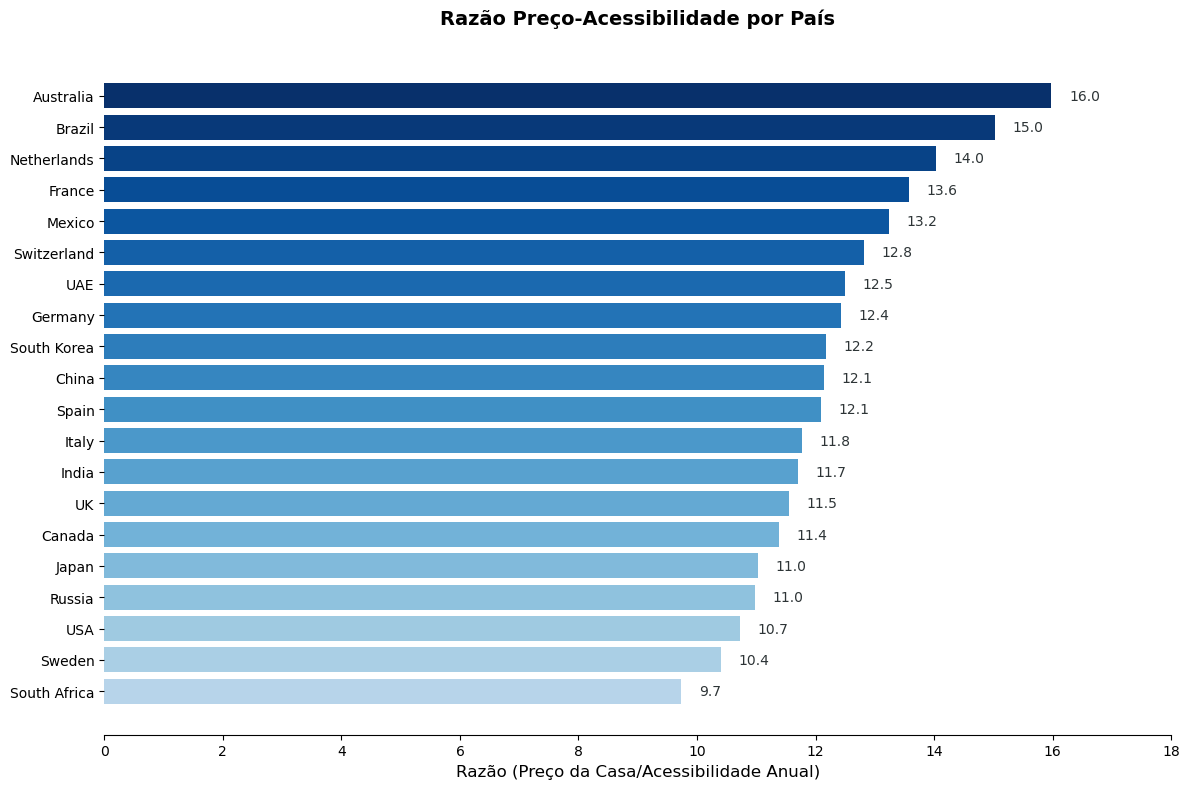

In [5]:
plt.plot_reason_price_income_house(process.get_df_reason_price_income())

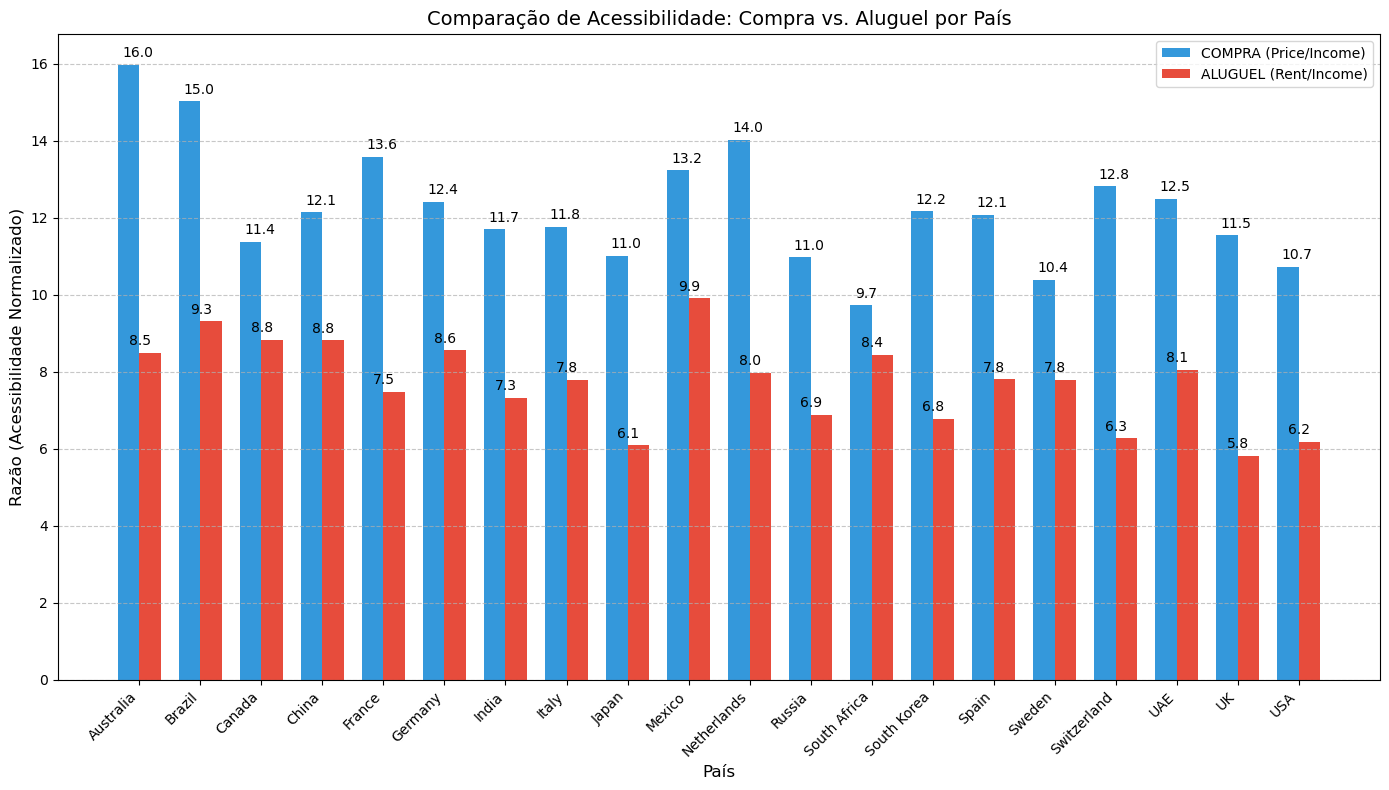

In [6]:
plt.plot_comparison_Affordability(process.get_df_buy_vs_rent())